# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Kyle Louderback
### Student ID: 015331667
### Email address: kyle.louderback@sjsu.edu


##  <u>References and sources </u>

Yulia Newton code sample <br>
https://www.kaggle.com/



##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from google.colab import drive 
drive.mount('/content/gdrive')
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


Mounted at /content/gdrive


#### Code the solution

###Load Data

In [ ]:
concrete_data = pd.read_csv('/content/gdrive/MyDrive/homework3_input_data.csv')
concrete_data

In [26]:
def diagnostic_plots(concrete_data, variable, csMPa):
    plt.figure(figsize=(18, 4))

    plt.subplot(1, 4, 2)
    plt.scatter(concrete_data[variable], concrete_data['csMPa'],color = 'g')
    plt.title('Scatterplot')
    plt.title(variable,loc='right')

    plt.show()

###csMPa Vs cement, slag, flyash, water, superplasticizer,coarseaggregate, fineaggregate, age.

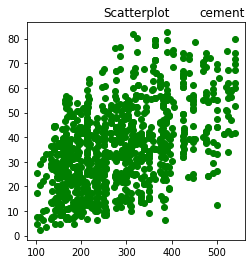

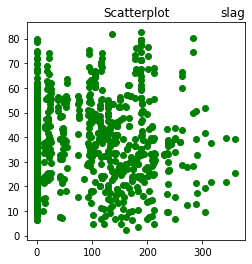

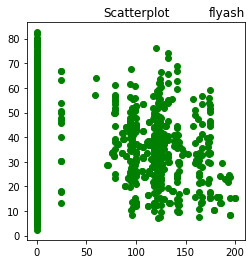

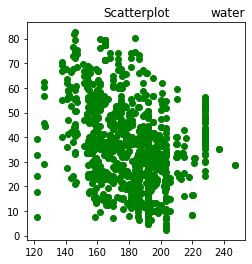

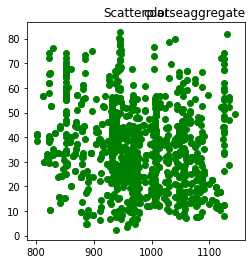

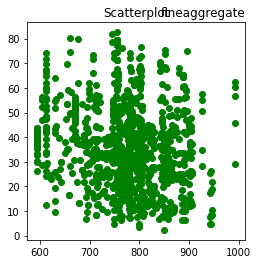

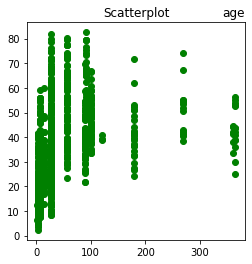

In [27]:
diagnostic_plots(concrete_data, 'cement','csMPa')
diagnostic_plots(concrete_data, 'slag','csMPa')
diagnostic_plots(concrete_data, 'flyash','csMPa')
diagnostic_plots(concrete_data, 'water','csMPa')
diagnostic_plots(concrete_data, 'coarseaggregate','csMPa')
diagnostic_plots(concrete_data, 'fineaggregate','csMPa')
diagnostic_plots(concrete_data, 'age','csMPa')

### Correlation


In [28]:
corrmat = concrete_data.corr()
corrmat

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


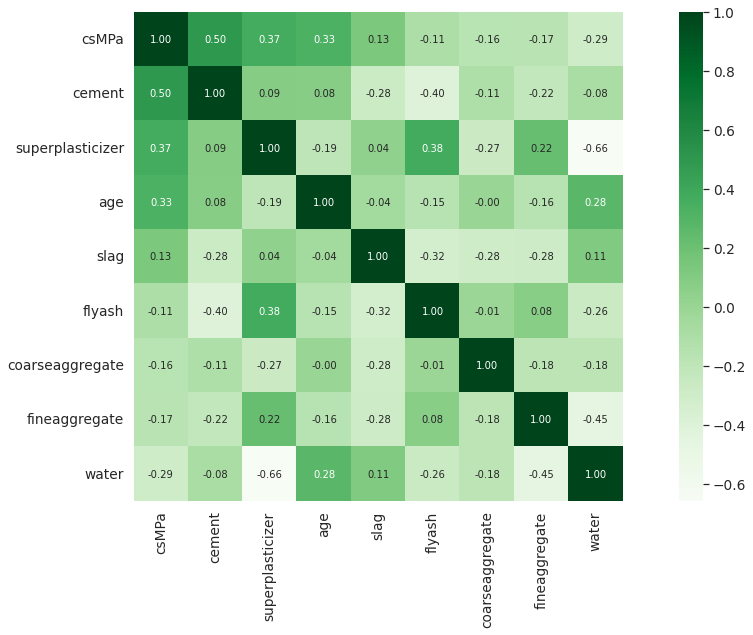

In [29]:
plt.figure(figsize=(20, 9))
k=9
cols = corrmat.nlargest(k, 'csMPa')['csMPa'].index
cm = np.corrcoef(concrete_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Greens")
plt.show()

In [30]:
concrete_feature = concrete_data.drop(['csMPa'], axis=1)
concrete_target = concrete_data['csMPa']
concrete_feature.shape, concrete_target.shape

((1030, 8), (1030,))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(concrete_feature, concrete_target, 
                                                    test_size=0.2, random_state=10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [32]:
lr = LinearRegression()

model_linear = lr.fit(X_train, Y_train)
print('LinearRegression Score: {0:.4f}'.format(model_linear.score(X_test, Y_test)))

from sklearn.metrics import mean_absolute_error
predictions = model_linear.predict(X_test)
print('LinearRegression MAE: {0:.4f}'.format(mean_absolute_error(Y_test, predictions)))


LinearRegression Score: 0.5912
LinearRegression MAE: 8.5053


In [33]:
print('Coefficients: \n', model_linear.coef_)

Y_test_pred = model_linear.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [ 0.12226049  0.10551064  0.09218552 -0.15212926  0.25469802  0.02128236
  0.02197247  0.11598932]
Mean squared error: 113.61
Coefficient of determination: 0.59


Text(0, 0.5, 'Predicted csMPa')

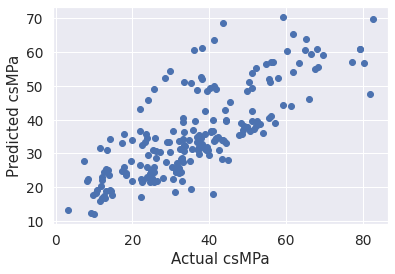

In [34]:
plt.scatter(Y_test,Y_test_pred)
plt.xlabel('Actual csMPa')
plt.ylabel('Predicted csMPa')